# Import Packages

In [14]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load Data


In [3]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
df_test = pd.read_csv('data/test.csv')
df_test.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [44]:
df_train.describe()

,id,date,num_sold
count,230130.000000,230130,221259.000000
mean,115064.500000,2013-07-02 00:00:00,752.527382
min,0.000000,2010-01-01 00:00:00,5.000000
25%,57532.250000,2011-10-02 00:00:00,219.000000
50%,115064.500000,2013-07-02 00:00:00,605.000000
75%,172596.750000,2015-04-02 00:00:00,1114.000000
max,230129.000000,2016-12-31 00:00:00,5939.000000
std,66432.953062,NaN,690.165445


In [45]:
df_test.describe()

,id,date
count,98550.000000,98550
mean,279404.500000,2018-07-02 00:00:00
min,230130.000000,2017-01-01 00:00:00
25%,254767.250000,2017-10-01 00:00:00
50%,279404.500000,2018-07-02 00:00:00
75%,304041.750000,2019-04-02 00:00:00
max,328679.000000,2019-12-31 00:00:00
std,28449.078852,NaN


In [40]:
df_train.nunique()

id          230130
date          2557
country          6
store            3
product          5
num_sold      4037
dtype: int64

In [42]:
df_test.nunique()

id         98550
date        1095
country        6
store          3
product        5
dtype: int64

In [51]:
print(df_train['country'].value_counts())
print()
print(df_train['store'].value_counts())
print()
print(df_train['product'].value_counts())

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64


## Convert dates to datetime

In [6]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

## Check for missing values

We see below that our target variable has 8871 missing values

In [7]:
df_train.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [8]:
df_test.isnull().sum()

id         0
date       0
country    0
store      0
product    0
dtype: int64

## Initial findings

We see above that the dataset has the features `id`, `date`, `country`, `store`, `product`, and target variable `num_sold`. The train set contains data from 2010 to 2016 and the test set is from 2017 to 2019. 

There are 6 different countries, 3 stores, and 5 products, all with equal proportions. These give us 90 (6 * 3 * 5) unique univariate time series. 

We also see that there are 8871 missing values for our target variable!

# EDA

## Distribution of Target Variable (num_sold)

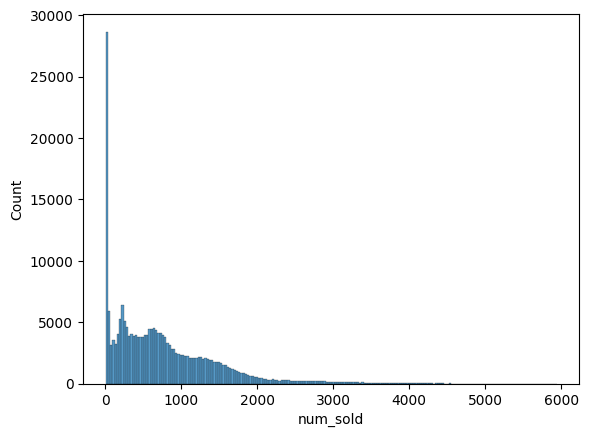

In [9]:
sns.histplot(df_train, x='num_sold');

## Monthly Sales Over Time

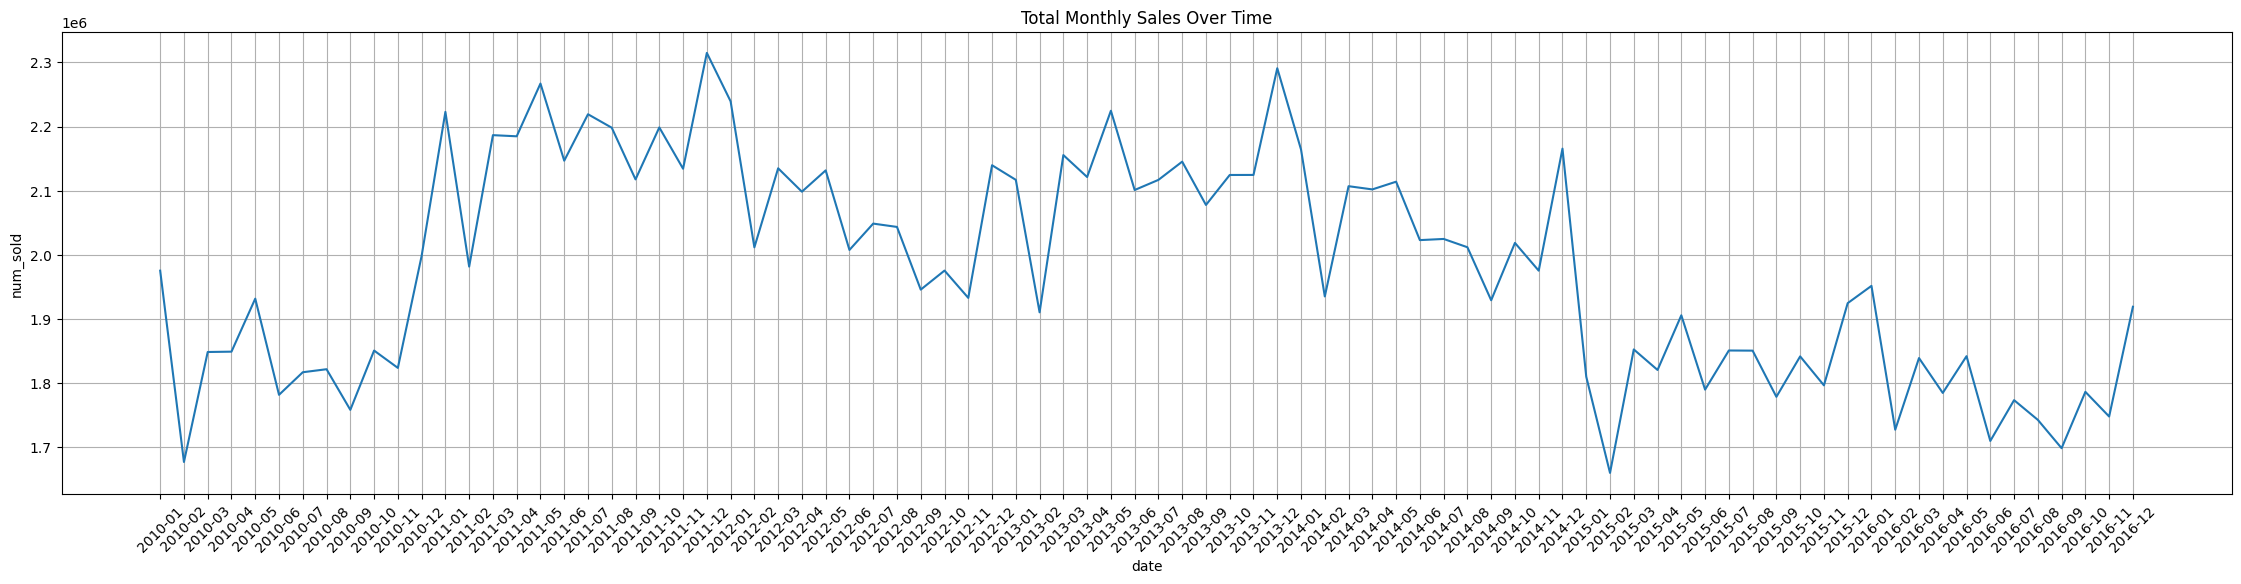

In [24]:
plt.figure(figsize=(28, 6))
ax = sns.lineplot(data=df_train.groupby([df_train.date.dt.strftime('%Y-%m')])['num_sold'].sum())
plt.grid()
ax.set_title('Total Monthly Sales Over Time')
plt.xticks(rotation = 45);
plt.show()

## Sales Over Time by Country

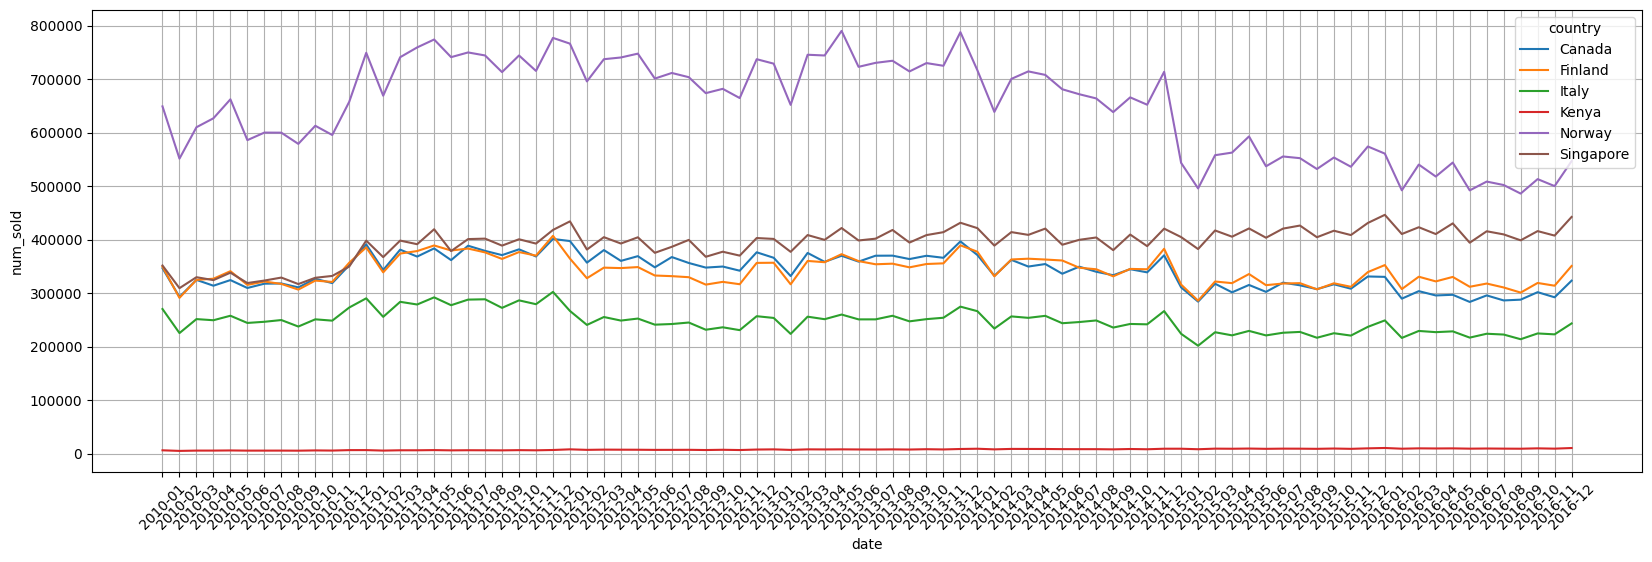

In [25]:
plt.figure(figsize = (20, 6))

sns.lineplot(data = df_train.groupby([df_train.date.dt.strftime('%Y-%m'), df_train.country])['num_sold'].sum().reset_index(),
                  x='date',
                  y='num_sold',
                  hue='country')
plt.grid()
plt.xticks(rotation = 45);

## Sales Over Time by Product

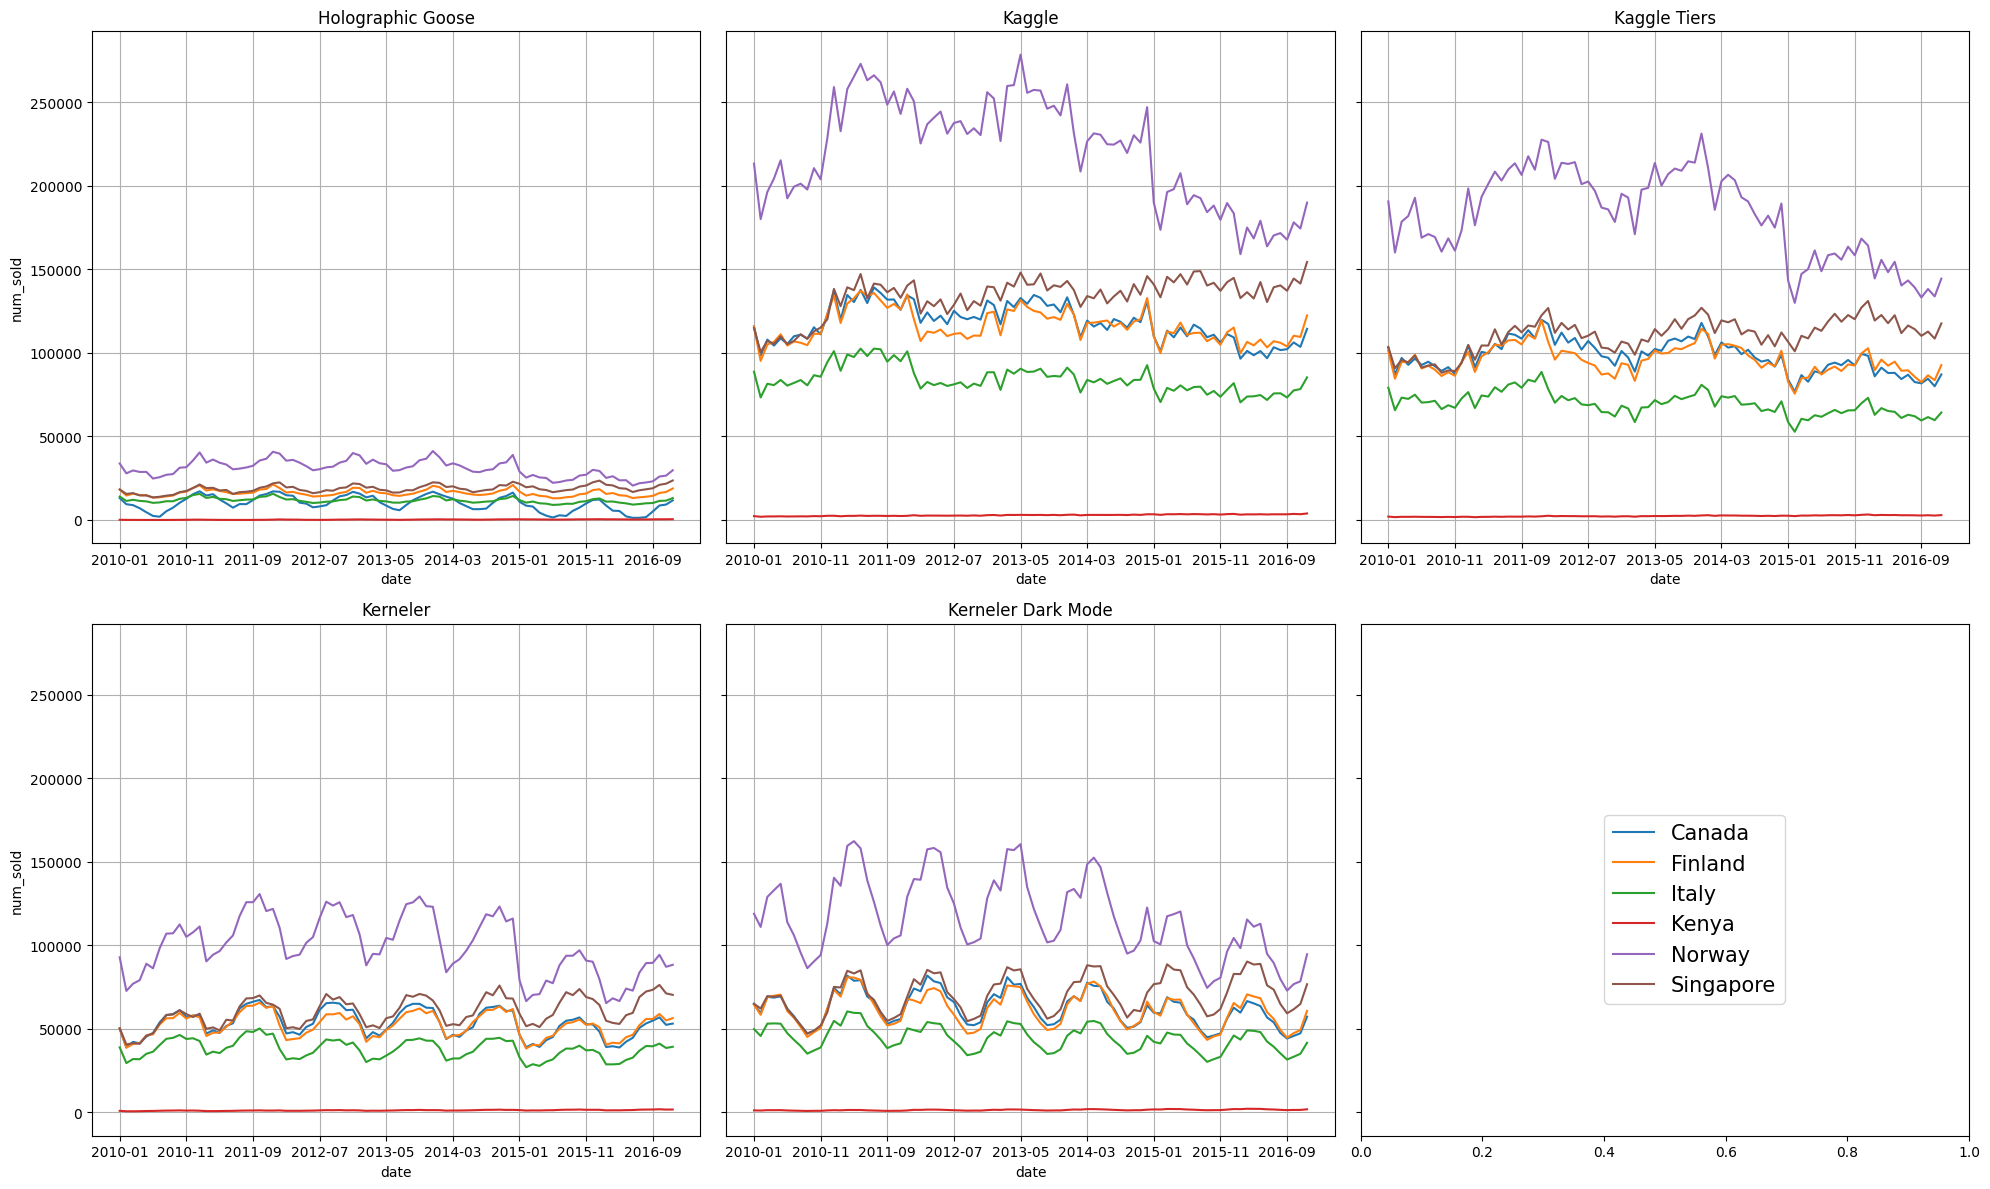

In [39]:
fig, ax = plt.subplots(2, 3, figsize = (20, 12), sharey = True)
ax = ax.flatten()
hue_order = df_train.country.unique()

for i, product in enumerate(df_train['product'].unique()):
    df = df_train[df_train['product'] == product]
    sns.lineplot(data = df.groupby([df.date.dt.strftime('%Y-%m'), df.country])['num_sold'].sum().reset_index(),
                 x = 'date',
                 y = 'num_sold',
                 hue = 'country',
                 ax = ax[i],
                 hue_order = hue_order
    )
    ax[i].set_title(product)
    ax[i].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
    
    ax[i].legend().remove()
    handles = ax[i].get_legend_handles_labels()[0]
    labels = ax[i].get_legend_handles_labels()[1]
    ax[i].grid()
    
# fig.legend(handles, labels, loc = 'upper center', bbox_to_anchor=(0.5, 1.03), fontsize = 14, ncol = 6)
fig.legend(handles, labels, loc = 'lower right', bbox_to_anchor=(0.9, 0.15), fontsize = 15, ncol = 1)
plt.tight_layout()